In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = pd.read_excel ('smotetomek_x.xlsx')
y = pd.read_excel ('smotetomek_x_y.xlsx')

#y=df[['NPL_COUNT']]
#X=df.drop('NPL_COUNT',axis=1)
y=pd.DataFrame(y)
X=pd.DataFrame(x)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [26]:
from sklearn.ensemble import RandomForestRegressor
classifier=RandomForestRegressor(
                            n_estimators=150,
                            max_features='log2',
                            min_samples_split=2,
                            min_samples_leaf=1,
                            max_depth=40)

In [27]:
classifier.fit(X_train, y_train)

C:\Users\USER\.conda\envs\Tensor_Flow\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(max_depth=40, max_features='log2', n_estimators=150)

In [28]:
y_pred = classifier.predict(X_test)
y_pred=y_pred .round()

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[5016  155]
 [ 133 5030]]


Text(0.5, 15.0, 'Predicted')

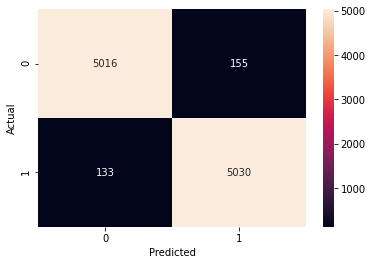

In [30]:
import seaborn as sns
def plot_confusion_matrix(data, labels, output_filename):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    cm = [[tp,fp],[fn,tn]]
    #Plot the matrix
sns.heatmap(cm, annot=True, fmt = "d")
    # labels, title and ticks 
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [31]:
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.9721308302690149


In [32]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      5171
           1       0.97      0.97      0.97      5163

    accuracy                           0.97     10334
   macro avg       0.97      0.97      0.97     10334
weighted avg       0.97      0.97      0.97     10334



In [33]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    
auc = roc_auc_score(y_test, y_pred)
print('AUC: %.2f' % auc)

AUC: 0.97


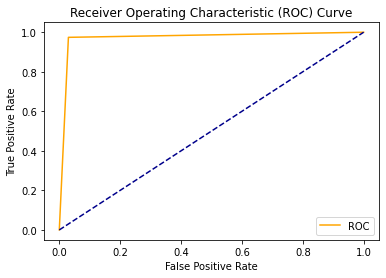

In [34]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

In [35]:
import pickle

In [36]:
pickle.dump(classifier, open('modelr.pkl','wb'))